# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Loading the csv File

In [44]:
df = pd.read_csv('earthquake_data_tsunami.csv')
df

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


### Checking the information

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   magnitude      782 non-null    float64
 1   cdi            782 non-null    int64  
 2   mmi            782 non-null    int64  
 3   sig            782 non-null    int64  
 4   nst            782 non-null    int64  
 5   dmin           782 non-null    float64
 6   gap            782 non-null    float64
 7   depth          782 non-null    float64
 8   latitude       782 non-null    float64
 9   longitude      782 non-null    float64
 10  Year           782 non-null    int64  
 11  Month          782 non-null    int64  
 12  tsunami        782 non-null    int64  
 13  tsunami_label  782 non-null    object 
dtypes: float64(6), int64(7), object(1)
memory usage: 85.7+ KB


### Checking the description

In [42]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


### Checking for null values

In [41]:
df.isnull().sum()

magnitude        0
cdi              0
mmi              0
sig              0
nst              0
dmin             0
gap              0
depth            0
latitude         0
longitude        0
Year             0
Month            0
tsunami          0
tsunami_label    0
dtype: int64

# Sloving Some Data Analysis Questions

## 1) Time-Based Analysis: 

###  Explore how earthquake occurrences and tsunami events have changed over the 22-year period  (2001–2022). 

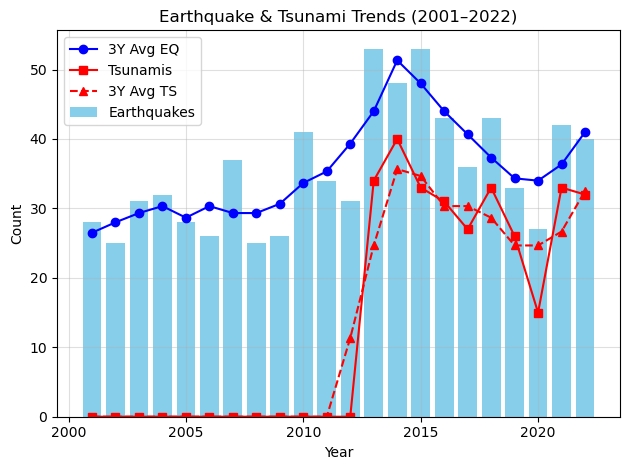

In [16]:
y = df.groupby("Year").size()
t = df.groupby("Year")["tsunami"].sum()

ma_y = y.rolling(3, center=True, min_periods=1).mean()
ma_t = t.rolling(3, center=True, min_periods=1).mean()

plt.bar(y.index, y, color='skyblue', label="Earthquakes")
plt.plot(ma_y.index, ma_y, 'bo-', label="3Y Avg EQ")
plt.plot(t.index, t, 'rs-', label="Tsunamis")
plt.plot(ma_t.index, ma_t, 'r^--', label="3Y Avg TS")
plt.title("Earthquake & Tsunami Trends (2001–2022)")
plt.xlabel("Year"); plt.ylabel("Count")
plt.legend(); plt.grid(alpha=0.4); plt.tight_layout(); plt.show()


###  Identify any trends in the frequency or magnitude of earthquakes over time.

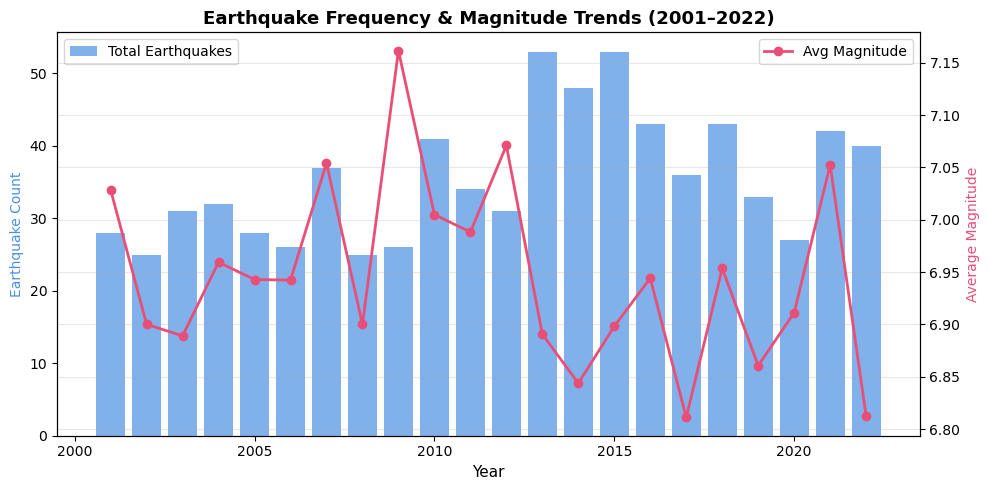

In [21]:
trend = df.groupby("Year").agg(
    count=("magnitude", "count"),
    avg_mag=("magnitude", "mean")
).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))

# Earthquake count (blue bars)
ax1.bar(trend["Year"], trend["count"], color='#4A90E2', alpha=0.7, label="Total Earthquakes")

# Average magnitude (orange line)
ax2 = ax1.twinx()
ax2.plot(trend["Year"], trend["avg_mag"], color='#E94E77', marker='o', linewidth=2, label="Avg Magnitude")

# Labels and formatting
ax1.set_xlabel("Year", fontsize=11)
ax1.set_ylabel("Earthquake Count", color='#4A90E2')
ax2.set_ylabel("Average Magnitude", color='#E94E77')

plt.title("Earthquake Frequency & Magnitude Trends (2001–2022)", fontsize=13, fontweight='bold')
ax1.legend(loc="upper left"); ax2.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 2) Magnitude and Depth Analysis: 

###    Analyze the distribution of earthquake magnitudes and depths. 

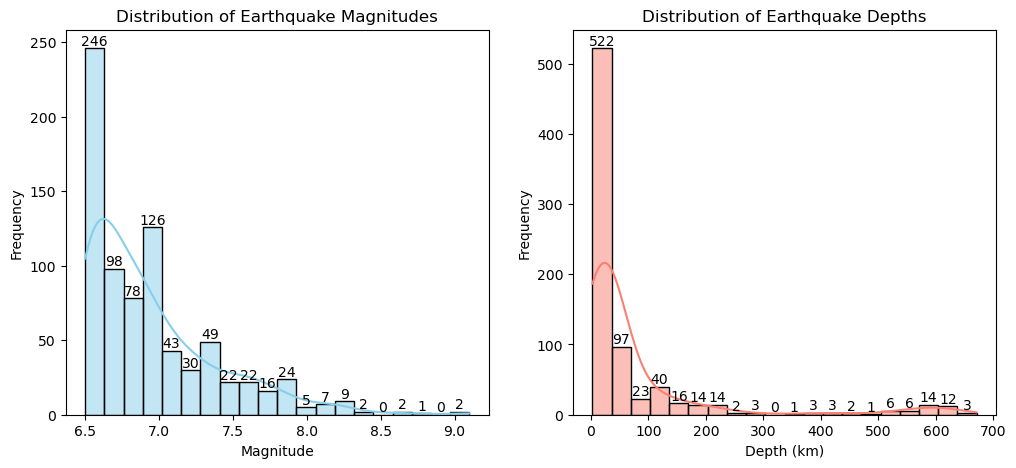

In [34]:
# Plot the distribution of Magnitude and Depth
plt.figure(figsize=(12,5))

# Magnitude distribution
plt.subplot(1,2,1)
ax = sns.histplot(df['magnitude'], bins=20, kde=True, color='skyblue')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

# Depth distribution
plt.subplot(1,2,2)
ax = sns.histplot(df['depth'], bins=20, kde=True, color='salmon')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')

plt.show()

### Compare the average magnitude and depth of tsunami vs. non-tsunami events. 

      tsunami  magnitude      depth
0  No Tsunami   6.942803  69.667356
1     Tsunami   6.938487  85.656796


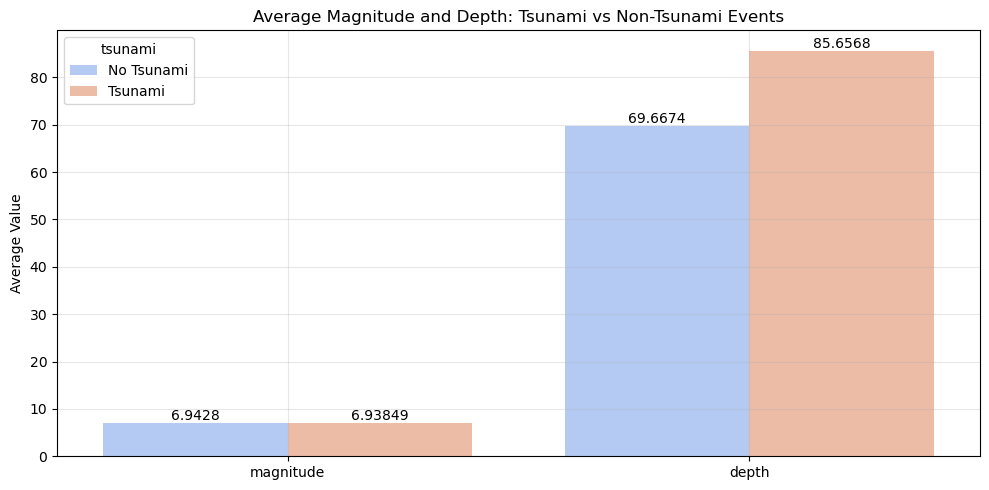

In [27]:
# Group by tsunami status and calculate averages
compare = df.groupby("tsunami")[["magnitude", "depth"]].mean().reset_index()

# Rename for readability
compare["tsunami"] = compare["tsunami"].map({0: "No Tsunami", 1: "Tsunami"})

print(compare)

# Plot comparison using side-by-side barplots
plt.figure(figsize=(10,5))
compare_melted = compare.melt(id_vars="tsunami", var_name="Metric", value_name="Average")

ax = sns.barplot(data=compare_melted, x="Metric", y="Average", hue="tsunami", palette="coolwarm")

for i in ax.containers:
    ax.bar_label(i)

plt.title("Average Magnitude and Depth: Tsunami vs Non-Tsunami Events")
plt.ylabel("Average Value")
plt.xlabel("")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###  Highlight major earthquakes (≥8.0) and their characteristics. 

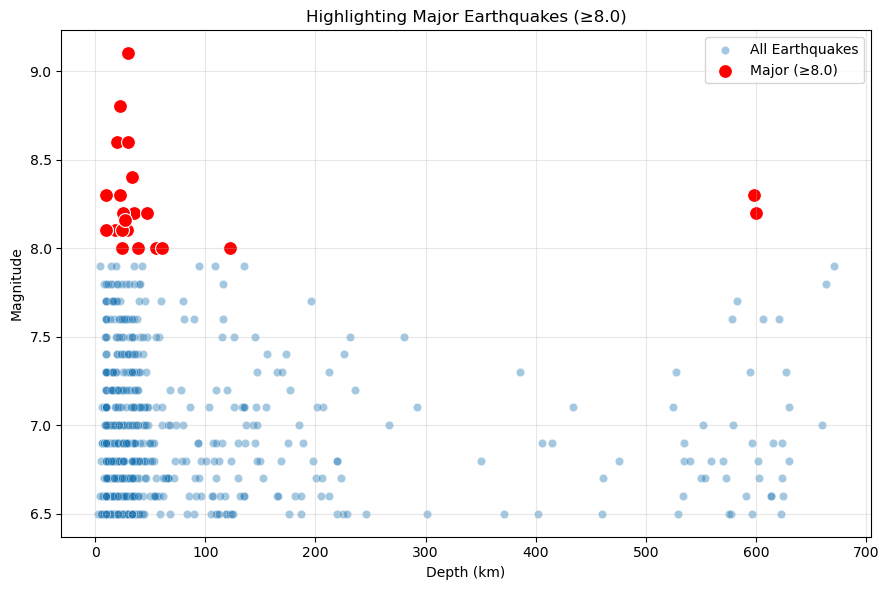

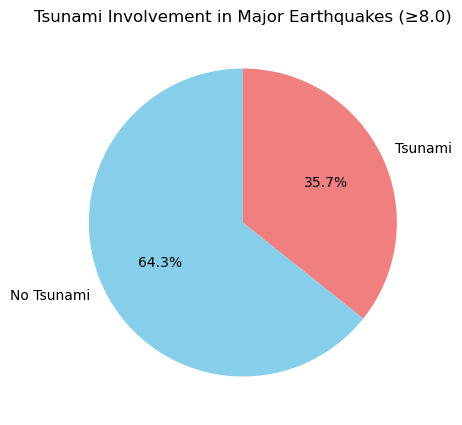

In [29]:
# Scatter Plot - Depth vs Magnitude for all, highlighting major quakes
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x="depth", y="magnitude", alpha=0.4, label="All Earthquakes")
sns.scatterplot(data=major_eq, x="depth", y="magnitude", color="red", s=100, label="Major (≥8.0)")
plt.title("Highlighting Major Earthquakes (≥8.0)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Pie chart - Tsunami vs Non-Tsunami among Major Earthquakes
plt.figure(figsize=(5,5))
major_eq["tsunami"].map({0: "No Tsunami", 1: "Tsunami"}).value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightcoral"]
)
plt.title("Tsunami Involvement in Major Earthquakes (≥8.0)")
plt.ylabel("")
plt.show()


## 3) Geographic Distribution Using 2D Plotting: 

###  Plot earthquake locations using latitude and longitude on a 2D scatter plot.

C:\Users\Karan\AppData\Local\Temp\ipykernel_29296\590517216.py:15: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\anacondapy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


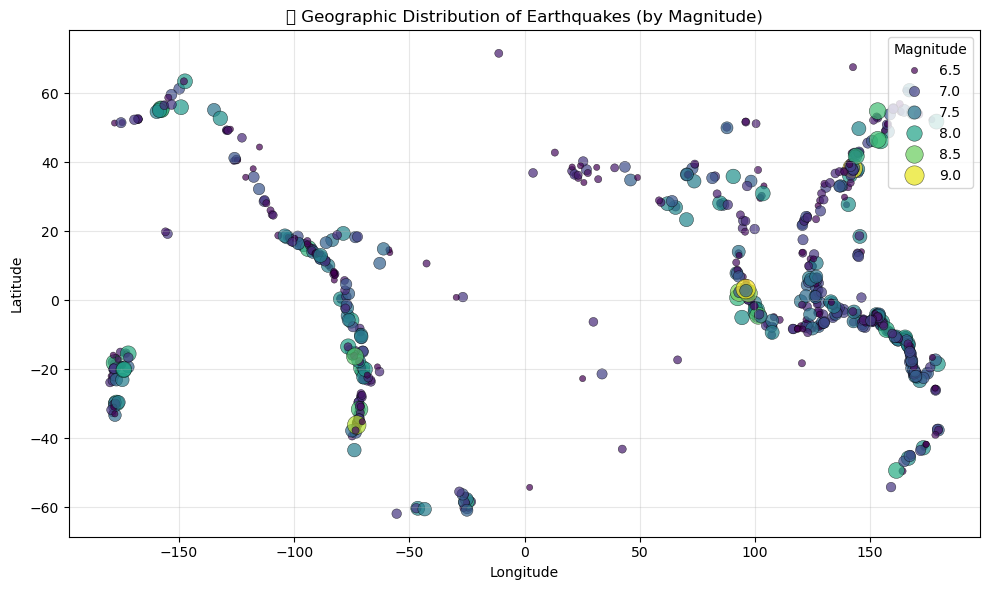

In [30]:
# Plot earthquake locations with color representing magnitude
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="longitude", y="latitude",
    hue="magnitude", size="magnitude",
    palette="viridis", sizes=(20, 200),
    alpha=0.7, edgecolor="black"
)
plt.title("🌎 Geographic Distribution of Earthquakes (by Magnitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Magnitude", loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###  Visually distinguish between tsunami and non-tsunami events. 

C:\Users\Karan\AppData\Local\Temp\ipykernel_29296\2754805580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tsunami_label", y="magnitude", palette=palette, ax=ax2)
C:\Users\Karan\AppData\Local\Temp\ipykernel_29296\2754805580.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tsunami_label", y="depth", palette=palette, ax=ax3)


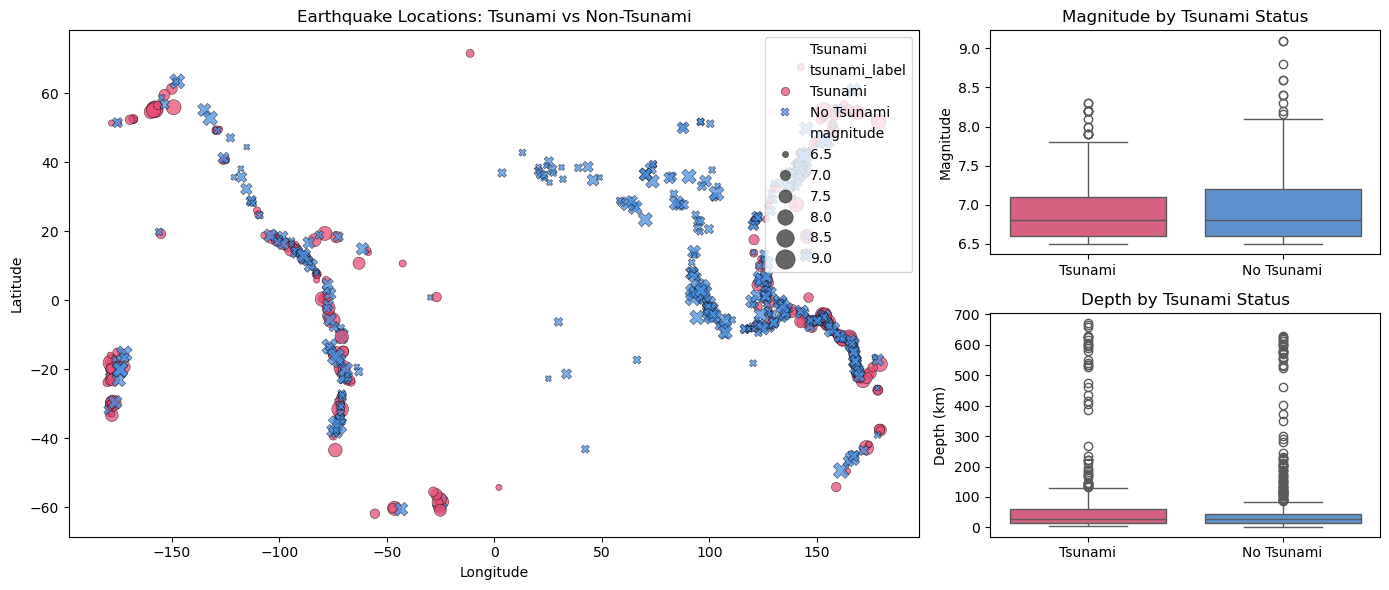

In [35]:
df["tsunami_label"] = df["tsunami"].map({0: "No Tsunami", 1: "Tsunami"})

palette = {"No Tsunami": "#4A90E2", "Tsunami": "#E94E77"}

fig = plt.figure(figsize=(14,6))

# --- Left: geographic scatter (Longitude vs Latitude) ---
ax1 = plt.subplot2grid((2,3), (0,0), rowspan=2, colspan=2)
sns.scatterplot(
    data=df, x="longitude", y="latitude",
    hue="tsunami_label", style="tsunami_label",
    size="magnitude", sizes=(20,200),
    palette=palette, alpha=0.75, edgecolor="k", ax=ax1
)
ax1.set_title("Earthquake Locations: Tsunami vs Non-Tsunami")
ax1.set_xlabel("Longitude"); ax1.set_ylabel("Latitude")
ax1.legend(title="Tsunami", loc="upper right")

# --- Top-right: Magnitude boxplot ---
ax2 = plt.subplot2grid((2,3), (0,2))
sns.boxplot(data=df, x="tsunami_label", y="magnitude", palette=palette, ax=ax2)
ax2.set_title("Magnitude by Tsunami Status")
ax2.set_xlabel(""); ax2.set_ylabel("Magnitude")

# --- Bottom-right: Depth boxplot ---
ax3 = plt.subplot2grid((2,3), (1,2))
sns.boxplot(data=df, x="tsunami_label", y="depth", palette=palette, ax=ax3)
ax3.set_title("Depth by Tsunami Status")
ax3.set_xlabel(""); ax3.set_ylabel("Depth (km)")

plt.tight_layout()
plt.show()


###  Identify clusters or regions with higher concentration of tsunami events (without using map tiles or interactive maps).

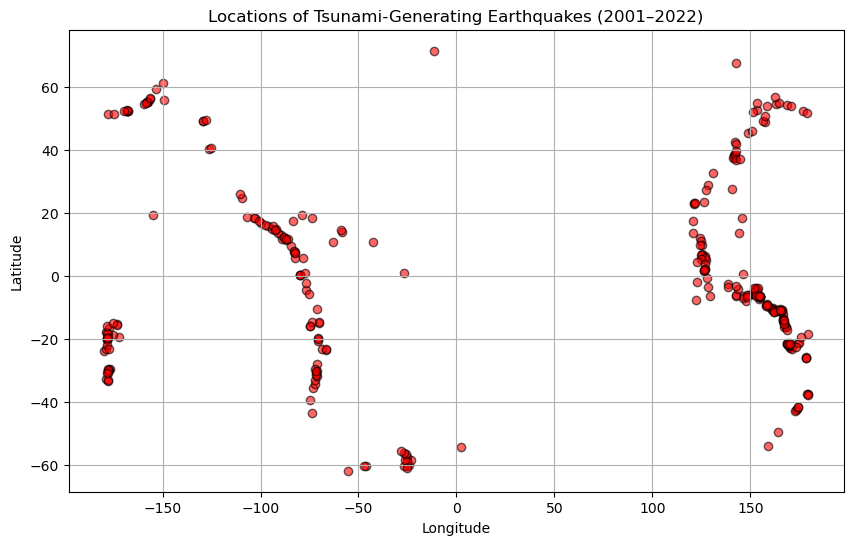

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(
    df[df['tsunami'] == 1]['longitude'],   # filter directly for tsunami events
    df[df['tsunami'] == 1]['latitude'],
    color='red', alpha=0.6, edgecolor='black'
)
plt.title("Locations of Tsunami-Generating Earthquakes (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## 4) Statistical and Comparative Analysis:

###  Use box plots, histograms, and bar chart to compare seismic features between tsunami and non-tsunami events. 

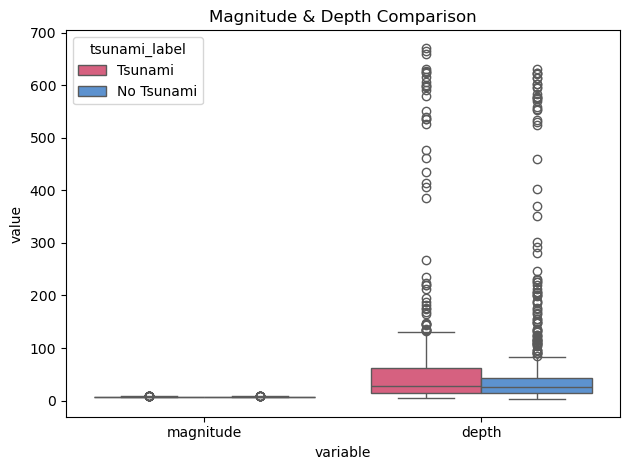

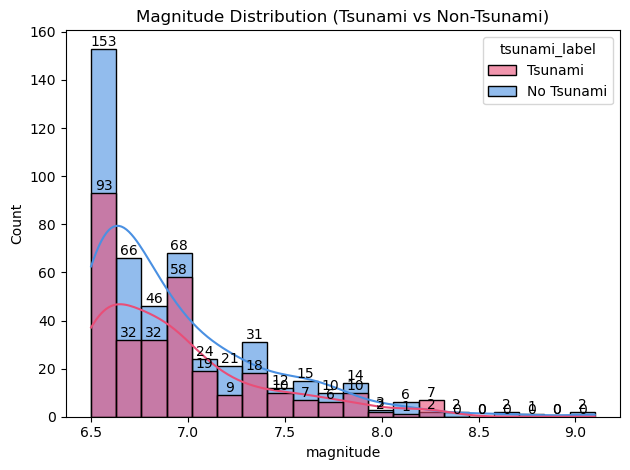

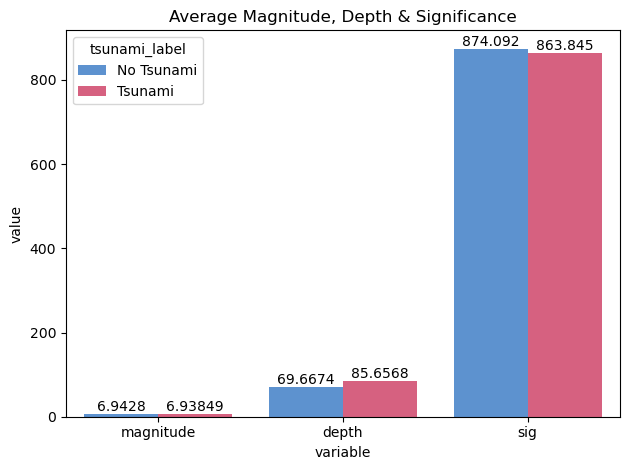

In [39]:
p = {"No Tsunami": "#4A90E2", "Tsunami": "#E94E77"}

# Boxplot: Magnitude & Depth
sns.boxplot(data=df.melt(id_vars="tsunami_label", value_vars=["magnitude","depth"]),
            x="variable", y="value", hue="tsunami_label", palette=p)
plt.title("Magnitude & Depth Comparison")
plt.tight_layout(); plt.show()

# Histogram: Magnitude
a = sns.histplot(data=df, x="magnitude", hue="tsunami_label", bins=20, kde=True,
             palette=p, alpha=0.6)

for i in a.containers:
    a.bar_label(i)

plt.title("Magnitude Distribution (Tsunami vs Non-Tsunami)")
plt.tight_layout(); plt.show()

# Bar Chart: Average Comparison
avg = df.groupby("tsunami_label")[["magnitude","depth","sig"]].mean().reset_index()
a = sns.barplot(data=avg.melt(id_vars="tsunami_label"), x="variable", y="value",
            hue="tsunami_label", palette=p)

for i in a.containers:
    a.bar_label(i)

plt.title("Average Magnitude, Depth & Significance")
plt.tight_layout(); plt.show()


###  Analyze correlations between variables using heatmaps. 

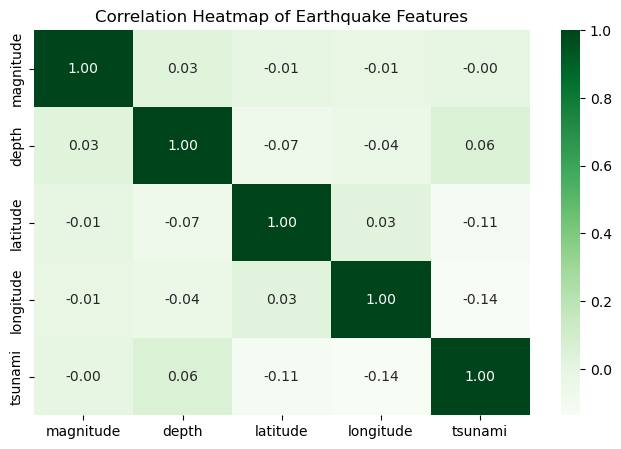

In [40]:
# Select only numeric columns for correlation
numeric_data = df[['magnitude', 'depth', 'latitude', 'longitude', 'tsunami']]

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f')

plt.title("Correlation Heatmap of Earthquake Features")
plt.show()

---
## 5) Insights and Observations:

---
##  **1️⃣ Magnitude Insights**

* **Tsunami earthquakes** generally have **higher magnitudes** (often ≥ 7.0).
* **Non-tsunami** events are spread more widely and include many moderate quakes (6.5–7.0 range).
* This aligns with physics — **larger magnitude = greater energy = higher chance of displacing seawater**, causing a tsunami.

 *From your histogram:*

> The red (tsunami) distribution is slightly shifted to the right — showing more high-magnitude events.

---

##  **2️⃣ Depth Insights**

* Tsunami earthquakes are **shallower**, mostly within the **first 100 km** of the crust.
* Non-tsunami quakes extend to **deep-focus levels (up to 600+ km)**.
* This makes sense because **only shallow quakes** can significantly disturb the ocean floor.

 *From the boxplot:*

> The median depth of tsunami quakes is much lower than non-tsunami ones.

---

##  **3️⃣ Significance (Impact) Insights**

* **Average “sig” (significance)** is **higher** for tsunami events, meaning they’re more impactful globally.
* Tsunami-related earthquakes likely have **greater media coverage, energy release, and casualties**.

 *From the bar chart:*

> Tsunami group bars for both *magnitude* and *significance* are higher; *depth* bar is lower.

---

##  **4️⃣ Overall Comparative Summary**

| Feature                | Tsunami Earthquakes 🌊                   | Non-Tsunami Earthquakes 🌋       |
| ---------------------- | ---------------------------------------- | -------------------------------- |
| **Magnitude**          | Higher (often ≥ 7.0)                     | Moderate (6.5–7.0 common)        |
| **Depth**              | Shallow (mostly < 100 km)                | Deeper and more variable         |
| **Significance (sig)** | Higher average                           | Lower average                    |
| **Tectonic Setting**   | Near oceanic trenches & subduction zones | Occur globally, including inland |

---

##  **5️⃣ Interpretation**

* **Tsunami generation** depends on a **combination** of high magnitude and shallow depth.
* **Deep quakes**, even if strong, **do not produce tsunamis** because they occur far below the ocean floor.
* The visual patterns you plotted confirm these **physical and geological principles** — strong, shallow, oceanic quakes are the most dangerous.

---
